In [1]:
#data processing 
import pandas as pd
import numpy as np
#visualization 
import matplotlib.pyplot as plt
import seaborn as sns
#models/analysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
#read in data
df = pd.read_csv("C:/Users/17326/OneDrive - go.Stockton.edu/Documents/dssa/fetal_health.csv")

In [3]:
#defining features and target variable
X = df.drop(["fetal_health"], axis= 1)
y = df["fetal_health"]

In [4]:
#Stanadrdizing the data
col_names = list(X.columns)
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)
X_Scaled = pd.DataFrame(X_Scaled, columns = col_names)

In [5]:
#train & test 
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size =0.2, random_state=42) #80/20 training test split

In [6]:
#create KNN classifier with k=3 
knn_model = KNeighborsClassifier(n_neighbors=3)

#fit the model to training data
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [7]:
# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.92018779342723
Classification Report:
               precision    recall  f1-score   support

         1.0       0.94      0.97      0.96       333
         2.0       0.81      0.69      0.75        64
         3.0       0.84      0.90      0.87        29

    accuracy                           0.92       426
   macro avg       0.87      0.85      0.86       426
weighted avg       0.92      0.92      0.92       426

Confusion Matrix:
 [[322   9   2]
 [ 17  44   3]
 [  2   1  26]]


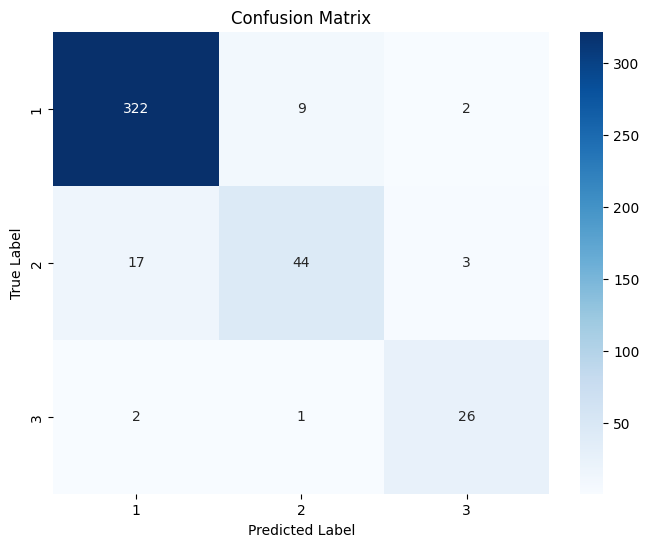

In [8]:
#visual of KNN confusion matrix

plt.figure(figsize=(8,6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[1,2,3], yticklabels=[1,2,3])

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel('True Label')
plt.show()